### 필요 라이브러리들 불러오기, train data 불러오기

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('IXI_train.csv')
train_data.head()

,ID,Sex,Age,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
0,IXI002,2.0,36.0,2.314134,2.445358,2.271341,2.295045,2.641145,2.789410,1.867423,...,2.417642,2.989790,2.802352,3.629097,3.922553,2.653073,2.690095,2.975480,2.922020,1393.44
1,IXI012,1.0,39.0,2.256589,2.679695,2.225613,2.416877,2.454876,2.438577,1.907090,...,2.375922,2.599895,2.467085,3.669829,3.288221,2.241236,2.109445,2.755640,2.801413,1622.12
2,IXI013,1.0,47.0,2.268161,2.233568,2.260727,2.013187,2.271975,2.470277,1.626596,...,2.435376,2.837961,2.213487,2.857899,3.033377,1.995272,2.270841,2.832390,2.885394,1541.86
3,IXI014,2.0,34.0,2.426588,2.517577,2.345924,2.179330,2.292475,2.520211,1.700885,...,2.410944,2.562584,2.628849,3.533523,3.024386,2.187879,2.511657,2.828906,2.789627,1327.05
4,IXI015,1.0,24.0,2.583845,2.716359,2.337998,2.287648,2.632270,2.574164,1.822473,...,2.602356,2.720133,2.393970,3.349275,3.239221,2.619177,2.593085,2.951370,2.846432,1499.27


### train data에서 Nan 값 제거

In [2]:
train_data = train_data.dropna(axis=0)
train_data.head()

,ID,Sex,Age,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
0,IXI002,2.0,36.0,2.314134,2.445358,2.271341,2.295045,2.641145,2.789410,1.867423,...,2.417642,2.989790,2.802352,3.629097,3.922553,2.653073,2.690095,2.975480,2.922020,1393.44
1,IXI012,1.0,39.0,2.256589,2.679695,2.225613,2.416877,2.454876,2.438577,1.907090,...,2.375922,2.599895,2.467085,3.669829,3.288221,2.241236,2.109445,2.755640,2.801413,1622.12
2,IXI013,1.0,47.0,2.268161,2.233568,2.260727,2.013187,2.271975,2.470277,1.626596,...,2.435376,2.837961,2.213487,2.857899,3.033377,1.995272,2.270841,2.832390,2.885394,1541.86
3,IXI014,2.0,34.0,2.426588,2.517577,2.345924,2.179330,2.292475,2.520211,1.700885,...,2.410944,2.562584,2.628849,3.533523,3.024386,2.187879,2.511657,2.828906,2.789627,1327.05
4,IXI015,1.0,24.0,2.583845,2.716359,2.337998,2.287648,2.632270,2.574164,1.822473,...,2.602356,2.720133,2.393970,3.349275,3.239221,2.619177,2.593085,2.951370,2.846432,1499.27


### train data preprocessing

In [3]:
import math

# ID 제거
Train = train_data.values
Train_1 = Train[:, 1]
Train_1 = Train_1.reshape(463, 1)

Train = Train[:, 3:]
Train = np.concatenate([Train_1, Train], axis=1)

# scaling data
for i in range(0, 463):
    Train[:, -1:][i] = Train[:, -1:][i]**(1.0/4.0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Train)
Train_scale = pd.DataFrame(scaler.transform(Train))
Train_scale = Train_scale.values

# target 분리
X = Train_scale 
y = train_data['Age'].values

### Target 분포 확인하기

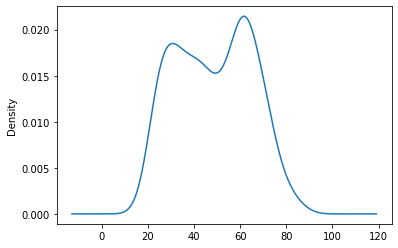

In [4]:
train_data['Age'].plot(kind = 'density')

### 필요한 library들 import

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

import matplotlib.pyplot as plt

### train data split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

### fit gaussian process regression model using train data

In [7]:
kernel = ConstantKernel() + ConstantKernel() * RBF() + WhiteKernel()
model = GaussianProcessRegressor(alpha= 1e-5,kernel=kernel, n_restarts_optimizer = 30)
model.fit(X_train, y_train)
y_pred_tr, y_pred_tr_std = model.predict(X_train, return_std=True)
y_pred_te, y_pred_te_std = model.predict(X_test, return_std=True)

### r2_score

In [8]:
print('R2_score = %.2f' % r2_score(y_test, y_pred_te))

R2_score = 0.72


### visualize results

<function matplotlib.pyplot.show(*args, **kw)>

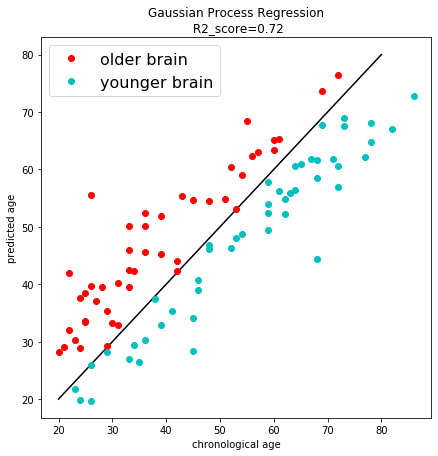

In [9]:
plt.figure(figsize = (7, 7))

for i in range(93):
    if(y_test[i] > y_pred_te[i]):
        young = plt.errorbar(y_test[i], y_pred_te[i], fmt='co')
    else:
        old = plt.errorbar(y_test[i], y_pred_te[i], fmt='ro')

plt.title('Gaussian Process Regression\n R2_score=%.2f' % r2_score(y_test, y_pred_te))
plt.xlabel('chronological age')
plt.ylabel('predicted age')

x_graph = np.linspace(20, 80, 100)
y_graph = x_graph
plt.plot(x_graph, y_graph, 'k')


plt.legend([old, young], ['older brain', 'younger brain',], fontsize=16)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

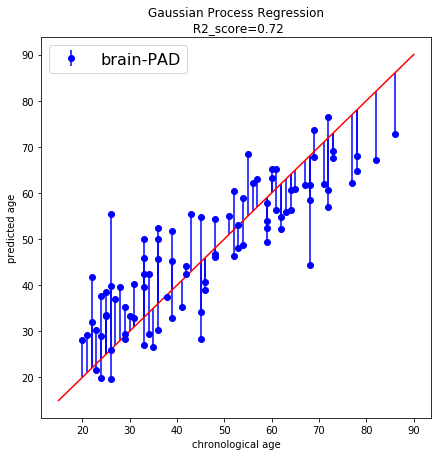

In [10]:
plt.figure(figsize = (7, 7))

for i in range(93):
    if(y_test[i] >= y_pred_te[i]):
        young = plt.errorbar(y_test[i], y_pred_te[i], yerr = [(0, ), (y_test[i] - y_pred_te[i],)], fmt='bo')
    else:
        old = plt.errorbar(y_test[i], y_pred_te[i], yerr = [(y_pred_te[i] - y_test[i],), (0, )], fmt='bo')
        

plt.title('Gaussian Process Regression\n R2_score=%.2f' % r2_score(y_test, y_pred_te))
plt.xlabel('chronological age')
plt.ylabel('predicted age')

x_graph = np.linspace(15, 90, 100)
y_graph = x_graph
plt.plot(x_graph, y_graph, 'r')


plt.legend([old], ['brain-PAD'], fontsize=16)

plt.show

### IXI_test data 불러오기

In [11]:
IXI_test_data = pd.read_csv('IXI_test.csv')
IXI_test_data.head()

,ID,Sex,Age,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
0,IXI026,2,NaN,2.790918,2.860664,2.377023,2.694348,2.767666,2.746961,1.887981,...,2.563580,2.934798,2.925411,3.349163,3.106885,2.481392,2.391845,3.349330,3.176278,1257.57
1,IXI027,1,NaN,2.594282,2.700979,2.458627,2.423396,2.742329,2.817457,1.737984,...,2.613335,2.751007,2.959820,3.667810,3.428951,2.370657,2.254736,3.067785,3.160975,1554.63
2,IXI028,1,NaN,2.597014,2.674919,2.258676,2.016510,2.460518,2.367396,1.595580,...,2.332489,2.843313,2.465880,3.841134,3.152598,1.926546,1.782548,3.100923,3.101951,1468.54
3,IXI040,2,NaN,2.520381,2.443344,2.236262,2.550456,2.453389,2.395759,1.772909,...,2.332510,2.426691,2.395207,3.659196,3.312159,2.337989,2.234992,2.824175,2.936322,1280.93
4,IXI041,1,NaN,2.669905,2.510474,2.209484,2.374890,2.539132,2.601794,1.935135,...,2.611295,2.469409,2.648380,3.893395,3.600993,2.437859,2.511397,2.859236,2.982760,1708.56


### IXI_test data preprocessing

In [12]:
IXI_Test = IXI_test_data.values

IXI_Test_1 = IXI_Test[:, 1]
IXI_Test_1 = IXI_Test_1.reshape(100, 1)

IXI_Test = IXI_Test[:, 3:]

IXI_Test = np.concatenate([IXI_Test_1, IXI_Test], axis=1)

for i in range(0, 100):
    IXI_Test[:, -1:][i] = IXI_Test[:, -1:][i]**(1.0/4.0)
    

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(IXI_Test)
IXI_Test_scale = pd.DataFrame(scaler.transform(IXI_Test))
IXI_Test_scale = IXI_Test_scale.values

X_IXI_test = IXI_Test_scale 
y_IXI_test = IXI_test_data['Age'].values

print(X_IXI_test)

[[ 0.86855395  2.06022336  1.81267592 ...  2.31552946  1.30926576
  -1.17315757]
 [-1.15133896  0.80925806  0.8915895  ...  0.83304858  1.22831896
   0.8994097 ]
 [-1.15133896  0.82663601  0.74127454 ...  1.0075364   0.91610098
   0.33177745]
 ...
 [-1.15133896 -0.19536707  0.99396575 ...  0.03515842 -1.06804538
   1.14140249]
 [-1.15133896 -1.73497532 -1.37640543 ... -1.59298208 -1.52470966
   1.57447924]
 [-1.15133896  1.1875096   1.01930532 ...  0.6225658   0.1787746
   1.98883328]]


### predict  age of IXI_test data using trained model

In [13]:
y_pred_IXI_test, y_pred_IXI_test_std = model.predict(X_IXI_test, return_std=True)

for i in range(100):
    y_pred_IXI_test[i] = round(y_pred_IXI_test[i])
    
print(y_pred_IXI_test)

[40. 41. 69. 58. 33. 42. 28. 28. 29. 34. 63. 36. 35. 29. 60. 42. 57. 47.
 40. 30. 39. 18. 57. 66. 37. 50. 62. 34. 25. 39. 33. 56. 73. 40. 49. 76.
 27. 50. 34. 34. 61. 61. 65. 62. 47. 61. 49. 49. 42. 47. 39. 29. 51. 62.
 41. 32. 33. 61. 47. 46. 52. 59. 53. 58. 61. 68. 70. 58. 33. 70. 40. 71.
 31. 64. 50. 40. 62. 76. 39. 76. 73. 64. 62. 51. 71. 42. 32. 56. 25. 38.
 43. 29. 53. 40. 42. 66. 44. 41. 57. 43.]


### export predict age of IXI_test data  to xlsx

In [14]:
IXI_test_age = pd.DataFrame({'ID': IXI_test_data["ID"], 'Age': y_pred_IXI_test})

#IXI_test_age.to_excel('IXI_test_brain_age_submission_소프트웨어융합학과_2020105742_한지훈_최종.xlsx', index = False)

### COBRE_test data 불러오기

In [15]:
COBRE_test_data = pd.read_csv('COBRE_test_scz.csv')
COBRE_test_data.head()

,ID,Age,Sex,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,...,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,ICV
0,40000,NaN,2,2.637,2.462,2.755,2.037,3.870,2.830,2.566,...,2.555,2.809,2.202,2.834,2.518,2.949,3.401,2.411,2.908,1376372.945
1,40001,NaN,1,2.449,2.379,2.553,1.969,3.567,2.590,2.463,...,2.450,2.657,2.142,2.688,2.476,2.730,3.519,2.147,2.737,1450970.104
2,40002,NaN,1,2.516,2.593,2.586,1.875,3.516,2.573,2.376,...,2.268,2.726,2.096,2.637,2.483,2.627,3.653,2.435,3.018,1455186.664
3,40003,NaN,1,2.458,2.695,2.654,1.779,3.270,2.605,2.458,...,2.256,2.598,2.164,2.783,2.544,2.616,3.925,2.018,3.217,1798564.922
4,40004,NaN,1,2.422,2.531,2.515,1.710,3.750,2.662,2.303,...,2.282,2.626,2.117,2.618,2.464,2.878,3.598,2.330,2.808,1678245.894


### COBRE_test data preprocessing

In [16]:
COBRE_Test = COBRE_test_data.values    

for i in range(72):
    COBRE_Test[i][71] = 0.001 * COBRE_Test[i][71]

COBRE_Test_1 = COBRE_Test[:, 2]
COBRE_Test_1 = COBRE_Test_1.reshape(72, 1)

COBRE_Test = COBRE_Test[:, 3:]

COBRE_Test = np.concatenate([COBRE_Test_1, COBRE_Test], axis=1)

np.set_printoptions(suppress=True)

for i in range(0, 72):
    COBRE_Test[:, -1:][i] = COBRE_Test[:, -1:][i]**(1.0/4.0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(COBRE_Test)
COBRE_Test_scale = pd.DataFrame(scaler.transform(COBRE_Test))
COBRE_Test_scale = COBRE_Test_scale.values

X_COBRE_test = COBRE_Test_scale 
y_COBRE_test = COBRE_test_data['Age'].values

print(X_COBRE_test)

[[ 2.03540098  1.10644625 -0.42796554 ...  0.3215593   0.15829241
  -1.1574305 ]
 [-0.49130368 -0.20157615 -0.83723456 ... -0.86573658 -0.69686166
  -0.74851488]
 [-0.49130368  0.26458077  0.21798917 ...  0.42949529  0.70839152
  -0.72587634]
 ...
 [-0.49130368  1.53781534 -0.85202741 ...  0.74430859 -0.62684905
  -0.17524084]
 [-0.49130368  0.43851992  1.48031288 ...  0.50145262 -0.20177246
  -0.47141783]
 [-0.49130368  1.38474889  0.69629151 ...  2.81757905  2.40869786
   0.33547578]]


### predict age of COBRE_test data using trained model

In [17]:
y_pred_COBRE_test, y_pred_COBRE_test_std = model.predict(X_COBRE_test, return_std=True)

for i in range(72):
    y_pred_COBRE_test[i] = round(y_pred_COBRE_test[i])
    
print(y_pred_COBRE_test)

[43. 34. 47. 46. 49. 61. 58. 56. 38. 37. 63. 52. 42. 45. 69. 45. 45. 42.
 42. 37. 45. 54. 50. 68. 59. 57. 50. 59. 34. 47. 43. 49. 45. 66. 42. 36.
 43. 73. 42. 59. 55. 40. 50. 44. 59. 54. 38. 58. 47. 58. 37. 42. 41. 44.
 48. 52. 45. 58. 49. 46. 42. 44. 60. 50. 49. 68. 64. 58. 34. 34. 48. 37.]


### export predict age of COBRE_test data to xlsx

In [18]:
COBRE_test_age = pd.DataFrame({'ID': COBRE_test_data["ID"], 'Age': y_pred_COBRE_test})

#COBRE_test_age.to_excel('COBRE_test_brain_age_submission_소프트웨어융합학과_2020105742_한지훈_최종.xlsx', index = False)